**Data Cleaning Transaction**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [9]:
# Loading customer demographic data  sheet from raw excel file
cust_trans= pd.read_excel('Raw_data.xlsx',sheet_name="Transactions")

cust_trans.head(5)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [10]:
# Information of columns and data-types of Transactions Data.

cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The datatype of product_first_sold_date column is not in datetime format. The data type of this column must be changed from int64 to datetime format.

In [11]:
#Total  Records

print("Total records in the dataset : {}".format(cust_trans.shape[0]))
print("Total columns in the dataset : {}".format(cust_trans.shape[1]))


Total records in the dataset : 20000
Total columns in the dataset : 13


In [12]:
#Convert data types
cust_trans['product_first_sold_date'] = pd.to_datetime(cust_trans['product_first_sold_date'], errors='coerce')

In [13]:
# Numeric columns and Non Numeric columns

# select numeric columns
df_numeric = cust_trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = cust_trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size' 'product_first_sold_date']


**Missing Value check**

In [14]:
cust_trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We could see there are columns like online_order,brand,product_line,product_size,product_class,standard_cost and product_first_sold_date 
is missing 

In [18]:
#Online order 

round(cust_trans["online_order"].isnull().mean()*100,2)

1.8

The onilne order have 1.8% of missing value we can replace this categorical column using mode calculation

In [22]:
#Finding most frequently occured values

most_freq_online_order=cust_trans["online_order"].mode()

most_freq_online_order

0    1.0
Name: online_order, dtype: float64

The most frequent online order value is 1 we can use this to replace null values 


In [23]:
#replace null values using 1 

cust_trans["online_order"].fillna(1,inplace=True)

In [24]:
cust_trans["online_order"].isnull().sum()

0

There is no null values in online order 

**Brand, product_line, product_class, product_size, standard_cost, product_first_sold_date missing value analysis**

In [28]:
round(cust_trans.isnull().mean()*100,1)

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      1.0
product_line               1.0
product_class              1.0
product_size               1.0
list_price                 0.0
standard_cost              1.0
product_first_sold_date    1.0
dtype: float64

From the above context every column has missing value of only 1% of data 

In [29]:

cust_trans[cust_trans["brand"].isnull()][["brand","product_line","product_class","product_size","standard_cost","product_first_sold_date"]]



,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaT
159,NaN,NaN,NaN,NaN,NaN,NaT
366,NaN,NaN,NaN,NaN,NaN,NaT
406,NaN,NaN,NaN,NaN,NaN,NaT
676,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...
19340,NaN,NaN,NaN,NaN,NaN,NaT
19383,NaN,NaN,NaN,NaN,NaN,NaT
19793,NaN,NaN,NaN,NaN,NaN,NaT
19859,NaN,NaN,NaN,NaN,NaN,NaT


And from the above data,if the column brand is null then every column related to brand like product_line ,product_class,product_size,standard_cost,	product_first_sold_date is null.
Its better to drop these column for our analysis 

In [30]:
#no of rows for null values
cust_trans[cust_trans["brand"].isnull()][["brand","product_line","product_class","product_size","standard_cost","product_first_sold_date"]].shape[0]


197

In [32]:
# record to drop values

drop_values=cust_trans[cust_trans["brand"].isnull()][["brand","product_line","product_class","product_size","standard_cost","product_first_sold_date"]].index

drop_values


Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [33]:
#drop values 
cust_trans.drop(index=drop_values,inplace=True,axis=0)

In [34]:
cust_trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Removed all null values in customer transaction data 

In [35]:
#Records after removing missing values

print("Total records after removing Missing Values: {}".format(cust_trans.shape[0]))

Total records after removing Missing Values: 19803


**Check Inconsistency in Data**


We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

In [36]:
#Online order

cust_trans["online_order"].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

There is no inconsistent in online_order columns


In [37]:
#order_status

cust_trans["order_status"].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

There is no inconsistent in order_status column

In [38]:
#product_line
cust_trans["product_line"].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

There is no inconsistent in product_line column


In [39]:
#product_class
cust_trans["product_class"].value_counts()


product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

There is no inconsistent in product_Class columns 

In [40]:
#brand

cust_trans["brand"].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

There is no inconsistent in brand columns

**Duplication Check**

In [41]:
#Return boolean series of duplicate values 
duplicates=cust_trans.duplicated()


#display duplicates rows
cust_trans[duplicates]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


Above there is no record of duplicate values.

**Creating a new feature**

Profit column is the difference between list price and standard price

In [42]:
#profit column

cust_trans["profit"]=cust_trans["list_price"]-cust_trans["standard_cost"]

In [43]:
cust_trans["profit"]

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: profit, Length: 19803, dtype: float64

C:\Users\jkart\AppData\Local\Temp\ipykernel_30756\3369678776.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans['profit'])
C:\Users\jkart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jkart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na'

<Axes: xlabel='profit', ylabel='Density'>

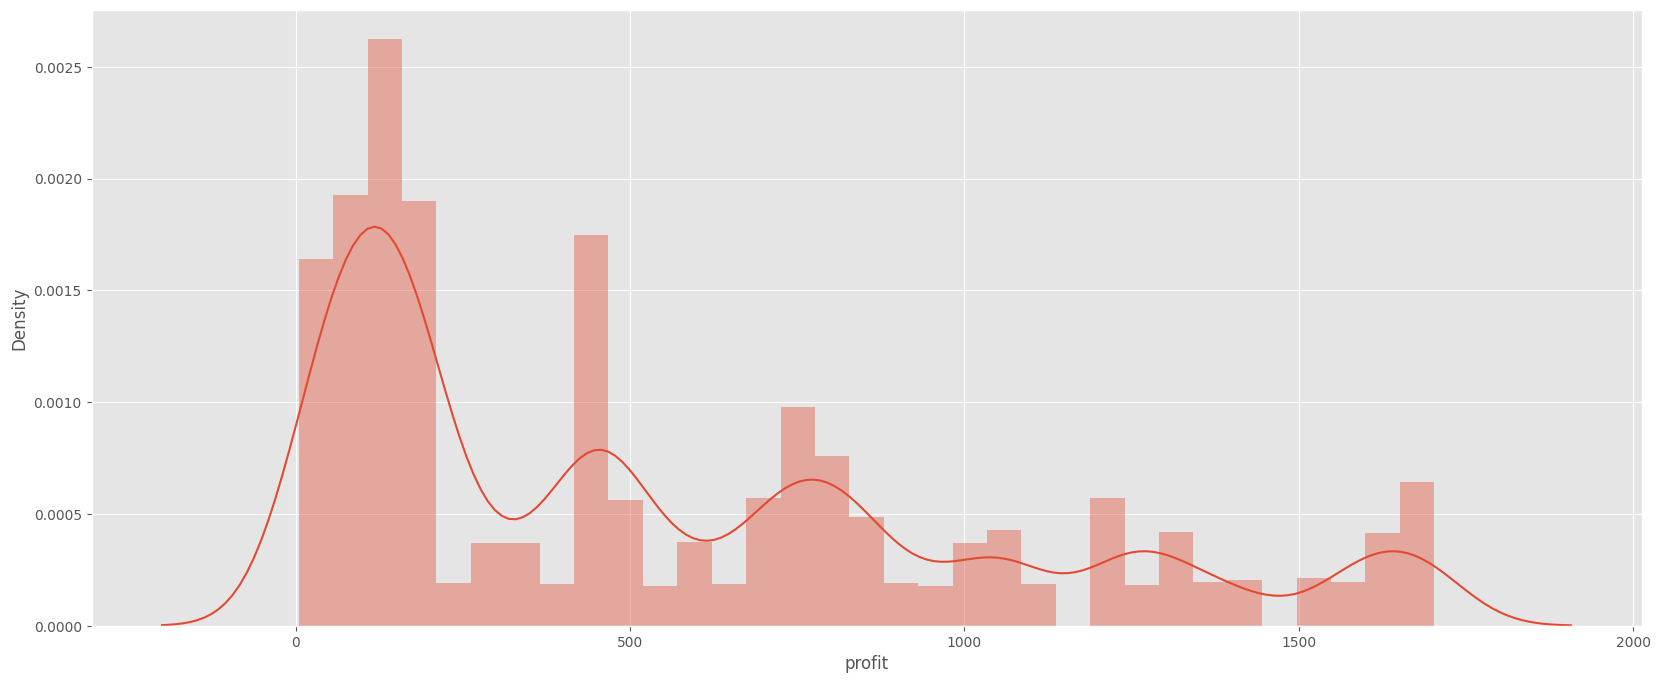

In [45]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.distplot(cust_trans['profit'])

**Exporting cleaned Transaction data to csv file**

In [46]:
cust_trans.to_csv('Transaction_Cleaned.csv', index=False)